# Atividade sobre agrupamento e avaliação

Para esta atividade, você deve realizar o agrupamento nos dados abaixo através de dois algoritmos:

* O hierarchical clustering (utilize o exemplo 2 deste [tutorial](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/#example2) como base)
    * Verifique através do dendograma a quantidade de clusters ideal
* O DBSCAN (utilize este [tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html) como base)

Para comparar os algoritmos, você deve utilizar:

* A silhueta como medida interna 
* O V-measure como medida externa 
    * O V-measure é uma medida baseada na entropia e assume valores entre 0 e 1, sendo 1 o valor que se adequa perfeitamente aos rótulos.
    
As duas métricas estão presentes no tutorial do DBSCAN.



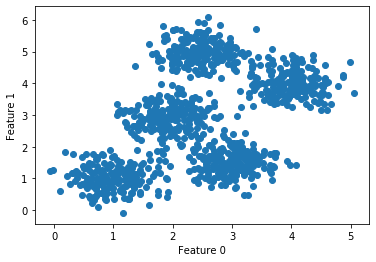

In [0]:
import numpy as np

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

centers = [[1, 1], [2, 3], [2.4, 5], [3, 1.5], [4, 4]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=0.4,
                            random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Hierarchical clustering

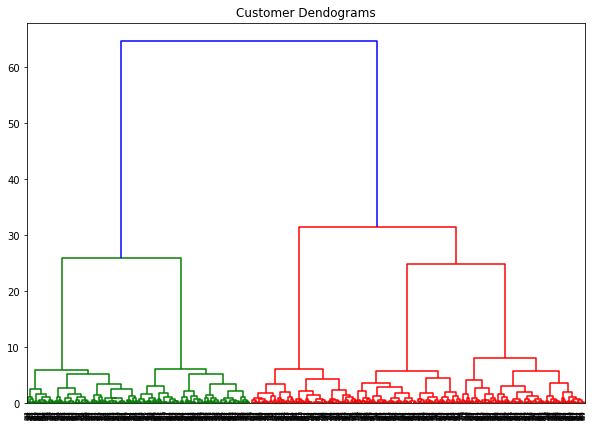

In [0]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

Seguindo o método do dendrograma, ele recomenda 2 clusteres. Pessoalmente, dividiria os clusteres em 5.

In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

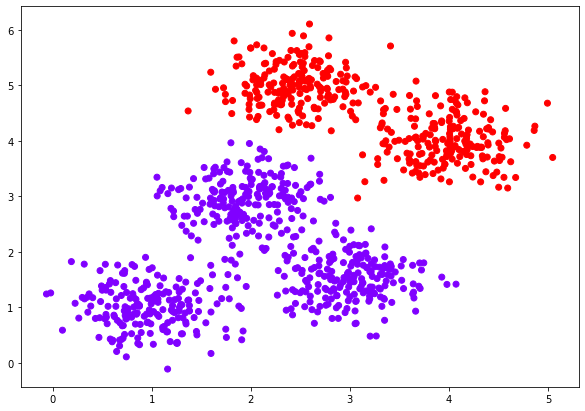

In [0]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

In [0]:
labels = cluster.labels_

In [0]:
print("Silhouette: ", metrics.silhouette_score(X, labels,metric='euclidean'))
print("V-Measure:", metrics.v_measure_score(labels_true, labels))

Silhouette:  0.5111689873205381
V-Measure: 0.584460976975948


DBSCAN 

In [0]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

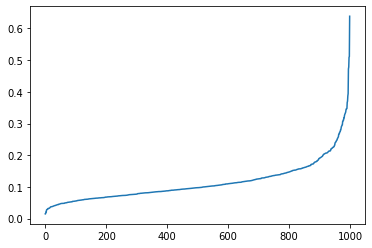

In [0]:
distances = np.sort(distances[:,3])
distances
plt.plot(distances)

Text(0, 0.5, 'Feature 1')

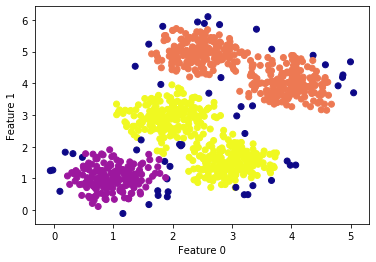

In [0]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=4).fit(X)
labels = db.labels_

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [0]:
print("Silhouette: ", metrics.silhouette_score(X, labels,metric='euclidean'))
print("V-Measure:", metrics.v_measure_score(labels_true, labels))

Silhouette:  0.4440232797467303
V-Measure: 0.7083844055786427


Os dois algoritimos apresentam resultados bem diferentes. O hierachical clustering acha 2 grupos e o DBScan usa 3. Neste caso especifico, o Hierchical Clustering foi melhor, pois agrupou melhor os dados (Silhouette). Porém os valores de v-measure são melhores para o DBScan o que indica um grau maior de pureza entre os grupos (apesar de alguns valores se sobreporem entre os grupos. Obviamente, esses valores dependem da aplicação final que não está clara no exercício. Outro ponto para levar em consideração é que o DBScan requer mais iterações de tentativa e erro até encontrar um valor rasoavel que separe os grupos.